__title__ = "Bachelor thesis"
__date__ = "June 10th 2021"
__contributors__ = "Matthew James Hudson, Thomas van der Zijden"
__license__ = "Public Domain"
__version__ = "1.0"

This section scrapes data from yahoo finance. The top 26 coins are taken over a pre-defined time interval. This time interval is 05th August 2018 - 02 May 2021. One coin is dropped (Tether, USTD) - a stablecoin - as this is pegged to the USD. Such coins have no purpose for this study as they remain stable around $1. 

In [69]:
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import requests
import datetime
import os
import shutil
import time
import csv
import random
dirpath = '/Users/Matt/Desktop/Thesis/data_raw'
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)
if not os.path.exists(dirpath):
    os.makedirs(dirpath)
ticker1=["BTC-USD",
"ETH-USD",
"XRP-USD",
"BCH-USD",
"EOS-USD",
"XLM-USD",
"LTC-USD",
"ADA-USD",
"MIOTA-USD",
"TRX-USD",
"XMR-USD",
"ETC-USD",
"NEO-USD",
"DASH-USD",
"XEM-USD",
"BNB-USD",
"XTZ-USD",
"ZEC-USD",
"VET-USD",
"OMG-USD",
"QTUM-USD",
"ZRX-USD",
"ZIL-USD",
"BTG-USD",
"BCN-USD"]
start=int(time.mktime(datetime.datetime(2018,8,4,23,59).timetuple()))
end=int(time.mktime(datetime.datetime(2021,5,2,23,59).timetuple()))
interval='1d' #interval='1d' #1d for daily #1mo for monthly
def stock_data(csv_url, tick):
    csv_str = requests.get(csv_url).text
    lines = csv_str.split("\\n")
    dest_url = f'/Users/Matt/Desktop/Thesis/data_raw/{tick}.csv'
    fx = open(dest_url, "w")
    for line in lines:
        fx.write(line + "\n")
    fx.close()
for tick in ticker1:
    yahoo_url=f'https://query1.finance.yahoo.com/v7/finance/download/{tick}?period1={start}&period2={end}&interval={interval}&events=history&includeAdjustedClose=true'
    stock_data(yahoo_url, tick)
master=pd.read_csv('/Users/Matt/Desktop/Thesis/master_daily.csv') #daily expected returns
ann=365

Once the data has been scraped, it needs some cleaning up. All columns, except for date and closing prices can be dropped from the .csv files as they will have no additional benefit for this study.

This section also checks each .csv file for null values, namely, cells with missing data. Missing data will be handled in the following code block.

In [70]:
nulls=[]
dirpath2 = '/Users/Matt/Desktop/Thesis/data_clean'
#if exists, then delete
if os.path.exists(dirpath2) and os.path.isdir(dirpath2):
    shutil.rmtree(dirpath2)
#make a clean folder
if not os.path.exists(dirpath2):
    os.makedirs(dirpath2)
def deletion(tick):
    data = pd.read_csv(f'/Users/Matt/Desktop/Thesis/data_raw/{tick}.csv')
    data.drop('Open', inplace=True, axis=1)
    data.drop('High', inplace=True, axis=1)
    data.drop('Low', inplace=True, axis=1)
    data.drop('Adj Close', inplace=True, axis=1)
    data.drop('Volume', inplace=True, axis=1)
    nulls.append([tick, data.isnull().values.ravel().sum()])
    data.to_csv(f'/Users/Matt/Desktop/Thesis/data_clean/{tick}.csv', index = False)
for tick in ticker1: #this runs through all of the cryptoassets which are passed through the function 'deletion'.
    deletion(tick)
#Ticker, No. missing entries]
#Prints the number of null entries for each .csv file in data_clean directory
#print(nulls)

This section handles missing data. After some investigation it was found that Yahoo Finance scrape their data from coinmarketcap (for crypto assets). For this reason, missing values are manually entered into the missing fields - taken from coinmarketcap.com. The result is a complete dataset for the time-period studied. 

In [71]:
def null4(p1, p2, p3, p4, tick):
    path=open(f'/Users/Matt/Desktop/Thesis/data_clean/{tick}.csv', 'r')
    reader = csv.reader(path)
    mylist = list(reader)
    path.close()
    mylist[623][1] = p1
    mylist[798][1] = p2
    mylist[801][1] = p3
    mylist[802][1] = p4
    my_new_list = open(f'/Users/Matt/Desktop/Thesis/data_clean/{tick}.csv', 'w', newline = '')
    csv_writer = csv.writer(my_new_list)
    csv_writer.writerows(mylist)
    my_new_list.close()
null4(171.64, 365.59, 387.73, 381.19, 'ETH-USD')
null4(0.1902, 0.2535, 0.2564, 0.2563, 'XRP-USD')
null4(233.62, 237.37, 239.81, 253.53, 'BCH-USD')
null4(2.64, 2.65, 2.65, 2.65, 'EOS-USD')
null4(0.04907, 0.07514, 0.07768, 0.07634, 'XLM-USD')
null4(42.75, 47.83, 50.74, 49.94, 'LTC-USD')
null4(0.03457, 0.1019, 0.11, 0.1089, 'ADA-USD')
null4(0.1579, 0.271, 0.2914, 0.2854, 'MIOTA-USD')
null4(0.013, 0.02622, 0.02708, 0.02679, 'TRX-USD')
null4(56.55, 116.03, 129.58, 127.78, 'XMR-USD')
null4(5.42, 5.27, 5.46, 5.36, 'ETC-USD')
null4(7.53, 17.43, 18.05, 17.59, 'NEO-USD')
null4(77, 67.43, 71.85, 71.42, 'DASH-USD')
null4(0.03791, 0.12, 0.1218, 0.1226, 'XEM-USD')
null4(15.74, 28.45, 30.71, 30.71, 'BNB-USD')
null4(2.10, 2.23, 2.37, 2.41, 'XTZ-USD')
null4(40.82, 65.48, 74.24, 71.01, 'ZEC-USD')
null4(0.5755, 3.49, 3.63, 3.53, 'OMG-USD')
null4(1.39, 2.34, 2.35, 2.33, 'QTUM-USD')
null4(0.1737, 0.3902, 0.3961, 0.4174, 'ZRX-USD')
null4(10, 8.10, 8.20, 8.07, 'BTG-USD')
null4(0.0002676, 0.0001345, 0.0001386, 0.0001371, 'BCN-USD')
null4(7096.18, 11064.46, 11555.36, 11425.90, 'BTC-USD')
#VET and ZIL have more than 4 nulls, therefore are done outside the function.
path=open('/Users/Matt/Desktop/Thesis/data_clean/VET-USD.csv', 'r')
reader = csv.reader(path)
mylist = list(reader)
path.close()
mylist[623][1] = '0.003811'
mylist[741][1] = '0.01976'
mylist[742][1] = '0.02048'
mylist[743][1] = '0.0196'
mylist[770][1] = '0.01328'
mylist[771][1] = '0.01342'
mylist[772][1] = '0.01277'
mylist[773][1] = '0.01285'
mylist[774][1] = '0.01259'
mylist[775][1] = '0.01247'
mylist[798][1] = '0.01149'
mylist[801][1] = '0.01141'
mylist[802][1] = '0.01149'
my_new_list = open('/Users/Matt/Desktop/Thesis/data_clean/VET-USD.csv', 'w', newline = '')
csv_writer = csv.writer(my_new_list)
csv_writer.writerows(mylist)
my_new_list.close()
#null7 ZIL-USD
path=open('/Users/Matt/Desktop/Thesis/data_clean/ZIL-USD.csv', 'r')
reader = csv.reader(path)
mylist = list(reader)
path.close()
mylist[623][1] = '0.004216'
mylist[741][1] = '0.02555'
mylist[742][1] = '0.02502'
mylist[743][1] = '0.02477'
mylist[798][1] = '0.02017'
mylist[801][1] = '0.0203'
mylist[802][1] = '0.01998'
my_new_list = open('/Users/Matt/Desktop/Thesis/data_clean/ZIL-USD.csv', 'w', newline = '')
csv_writer = csv.writer(my_new_list)
csv_writer.writerows(mylist)
my_new_list.close()

This section is responsible for the computation of price changes for each crypto asset. For the daily time interval, the result is expected daily returns.

Once the expected returns are computed for each crypto-asset, the .csv files are once again cleaned up where any irrelevant data is dropped. In this case, the closing prices are now removed as the expected returns have just been computed. The first expected return for the 5th August 2018 is also dropped as this contains a 'null' value. Seeing as our time period started on the 5th August 2018, the expected return for this date is not computable (where expected return is computed as ([n+1]-n)/n).

In [72]:
for tick in ticker1:
    df=pd.read_csv(f'/Users/Matt/Desktop/Thesis/data_clean/{tick}.csv')
    daily_returns = df['Close'].pct_change()
    df['Returns'] = daily_returns
    df.to_csv(f'/Users/Matt/Desktop/Thesis/data_clean/{tick}.csv', index = False)
#more clean-up
dirpath = '/Users/Matt/Desktop/Thesis/data_clean'
def deletion(tick):
    data = pd.read_csv(f'/Users/Matt/Desktop/Thesis/data_clean/{tick}.csv')
    data.drop('Close', inplace=True, axis=1)
    data.columns=['Date', tick]
    data2=data.drop(data.index[0]) #removes NAN as expected returns from day 0 are not computable
    data2.to_csv(f'/Users/Matt/Desktop/Thesis/data_clean/{tick}.csv', index = False)
for tick in ticker1:
    deletion(tick)

This section is responsible for data extraction which will be used to compute the primary statistics of the paper. First, the base portfolio [BTC] is taken, where summary statistics are drawn which will be used in the computation of Sharpe ratios and for comparison purposes with n-portfolios. For Bitcoin: The annual expected return is computed; the annual standard deviation is computed and the Sharpe ratio is computed.

Next, the n-portfolios are built. At the beginning, the user has the possibility to define the upper and lower bounds of the n-portfolios as well as the number of randomisations for each portfolio mix. Seeing as bitcoin is used as our n=1 base portfolio, the lower bound is set to 2. The upper bound is set to 10. Therefore, the code will create portfolio mixes n=2 up until n=10 crypto-assets. 

In order to overcome 'selection bias', namely: manually selecting crypto-assets to be part of each n-portfolio, a randomizer function is initialized which randomly draws the crypto-assets from the crypto-asset pool of 25 crypto-assets for each n-portfolio. The number of randomizations for each n-portfolio is set to 150 randomizations based on the possible number of unique combinations that can be made from the lowest n-portfolio. This is computed statistically through 25choose2 and the result is 300. If 300 randomizations were selected, every possible combination would be accounted for which would have the opposite effect of the selection bias set out to avoid. By taking an average of 300 randomizations or higher, the results, particularly for n=2 would end up converging. For this reason, 150 randomizations (the half) is selected.

Once the randomizer is set, the expected returns and standard deviations of each mix (here, 150 mixes) for each n-portfolio are appended to individual temporary lists. Once the randomizations are complete, averages are taken over both lists which are used as a base for the final computation of annualized expected returns and standard deviations. These results are stored in a dictionary. 

In [110]:
rf=1.85 #risk-free rate
#bitcoin statistics
btc_df=pd.read_csv('/Users/Matt/Desktop/Thesis/data_clean/BTC-USD.csv')
btc_df.set_index('Date', inplace=True)
btc_annual_expected_return=(((btc_df['BTC-USD'].mean()+1)**ann)-1)*100
btc_annual_st_d=(btc_df['BTC-USD'].std())*math.sqrt(ann)*100
sharpe_btc=(btc_annual_expected_return-rf)/btc_annual_st_d    


ticker2=[]
for tick in ticker1:
    ticker2.append(tick[:-4])
#affect of increasing the number of mixes: improved robustness of results, reduced selection bias


mixes=150 #number of portfolio-mixes for each n-portfolio
max_size=10 #maximum bound for n-portfolios to create
min_size=2 #minimum bound for n-portfolios to create


all_mixes = {} #dictionary that stores all portfolio-mixes for all n-portfolios
def create_random_portfolio(assets, sample_size, asset_size):
    return [random.sample(assets, sample_size) for i in range(asset_size)]
#appends all crypto-mixes to all_mixes dictionary: bounds are min_size and max_size
for x in range(min_size, max_size+1):
    all_mixes["portfolio{0}".format(x)] = create_random_portfolio(ticker2, x, mixes)
def portfolio_expected_returns(portfolio):
    mix_returns=[]     #initialization of empty list
    port_sd=[]
    for i in portfolio: #for each portfolio-mix in the n-portfolio (here 10)
        cryptos=len(portfolio[0])
        p_weights=np.repeat(1/cryptos, cryptos) #allocates equal weighting based on the number of cryptos in the portfolio
        temp=master.iloc[:][i].mul(p_weights, axis=1).sum(axis=1) #dataframe of average expected returns based on the assets in each portfolio
        mix_returns.append(temp.mean()) #appends the mean of each n-portfolio in the crypto-mix to a list
        covariance=master[i].cov()
        annualized_covariance=covariance*ann
        port_sd.append(np.sqrt(np.dot(p_weights.T, np.dot(annualized_covariance, p_weights)))) ##portfolio s_d
    return (((((sum(mix_returns)/mixes)+1))**ann)-1)*100, (sum(port_sd)/mixes)*100
basic_statistics={} #stores the expected portfolio annualized return and annualized standard deviation per n-portfolio

Once the portfolio statistics have been stored, they are compiled into a table which will assist in data analysis. Three tables are made, the first contains all n-portfolios that were made from the previous code block. The second, is a table wirh the base portfolio BTC. The third gives annualized statistics for the top 3 peforming coins for the whole period. The statistics from table 3 further reinforce the decision to select BTC at the benchmark portfolio.

In [111]:
bt_sd=btc_df['BTC-USD'].std()
bt_me=btc_df['BTC-USD'].mean()
x1 = PrettyTable()
x1.field_names = ["n", "E[rp]", "std[p]", "Sharpe Ratio"] #n-portfolio from n=2
x2 = PrettyTable()
x2.field_names = ["benchmark", "E[r]", "std", "Sharpe Ratio"]
x2.add_row(["BTC", "{:.2f}".format(btc_annual_expected_return)+"%", "{:.2f}".format(btc_annual_st_d)+"%", "{:.2f}".format(sharpe_btc)])
for x in range(min_size, max_size+1):
    basic_statistics["mix{0}".format(x)] = portfolio_expected_returns(all_mixes["portfolio{0}".format(x)])
print("randomizations =",mixes)
counter=min_size-1
for i, j in basic_statistics.values():
    counter+=1 #for creating the n-portfolio column in the table
    x1.add_row([counter, "{:.2f}".format(i)+"%", "{:.2f}".format(j)+"%", "{:.2f}".format((i-rf)/j)])
print(x1)
print(x2)
print("\n")
print("Annual-stats for top three performing CC's")
top3=['ADA-USD','VET-USD','BNB-USD'] #top 3 returns
x4 = PrettyTable()
x4.field_names = ["CC", "E[r]", "std", "Sharpe Ratio"]
for i in top3:
    temp_df_2=pd.read_csv(f'/Users/Matt/Desktop/Thesis/data_clean/{i}.csv')
    er=(((temp_df_2[i].mean()+1)**ann)-1)*100
    std=(temp_df_2[i].std())*math.sqrt(ann)*100
    sharpe=(er-rf)/std
    x4.add_row([i, "{:.2f}".format(er)+"%", "{:.2f}".format(std)+"%", "{:.2f}".format(sharpe)])
print(x4)
print(basic_statistics)

randomizations = 150
+----+---------+---------+--------------+
| n  |  E[rp]  |  std[p] | Sharpe Ratio |
+----+---------+---------+--------------+
| 2  | 185.88% | 100.03% |     1.84     |
| 3  | 191.04% |  95.46% |     1.98     |
| 4  | 195.54% |  92.91% |     2.08     |
| 5  | 185.79% |  91.49% |     2.01     |
| 6  | 186.65% |  90.04% |     2.05     |
| 7  | 189.79% |  89.47% |     2.10     |
| 8  | 187.86% |  89.18% |     2.09     |
| 9  | 187.10% |  88.43% |     2.09     |
| 10 | 188.91% |  88.42% |     2.12     |
+----+---------+---------+--------------+
+-----------+---------+--------+--------------+
| benchmark |   E[r]  |  std   | Sharpe Ratio |
+-----------+---------+--------+--------------+
|    BTC    | 177.90% | 71.68% |     2.46     |
+-----------+---------+--------+--------------+


Annual-stats for top three performing CC's
+---------+---------+---------+--------------+
|    CC   |   E[r]  |   std   | Sharpe Ratio |
+---------+---------+---------+--------------+
| ADA-U

Testing for Sharpe Ratio significance

In [98]:
bt_sd=master['BTC'].std()
bt_me=master['BTC'].mean()
def portfolio_expected_returns2(portfolio):
    mix_returns=[]     #initialization of empty list
    port_sd=[]
    cov=[]
    for i in portfolio: #for each portfolio-mix in the n-portfolio (here 10)
        cryptos=len(portfolio[0])
        p_weights=np.repeat(1/cryptos, cryptos) #allocates equal weighting based on the number of cryptos in the portfolio
        temp=master.iloc[:][i].mul(p_weights, axis=1).sum(axis=1) #dataframe of average expected returns based on the assets in each portfolio
        cov.append(temp.cov(master['BTC']))
        ann_cov=cov*ann
        mix_returns.append(temp.mean()) #appends the mean of each n-portfolio in the crypto-mix to a list
        covariance=master[i].cov()
        annualized_covariance=covariance*ann
        port_sd.append(np.sqrt(np.dot(p_weights.T, np.dot(annualized_covariance, p_weights))))
    return (((((sum(mix_returns)/mixes)+1))**ann)-1), (sum(port_sd)/mixes), sum(ann_cov)/mixes
x6 = PrettyTable()
x6.field_names = ["n", "sqrt(V)", "Z"] #n-portfolio from n=2
x6.add_row(["BTC", "-", "-"])
basic_statistics2={}
counter=1
for x in range(min_size, max_size+1):
    basic_statistics2["mix{0}".format(x)] = portfolio_expected_returns2(all_mixes["portfolio{0}".format(x)])
#i expected return
#j standard deviation
for i, j, l in basic_statistics2.values():
    counter+=1
    theta=abs((1/1002)*(((2)*((j**2)*(bt_sd**2)))-((2)*(bt_sd*j*l))+((0.5)*((i**2)*(bt_sd**2)))+((0.5)*((bt_me**2)*(j**2)))-(((i*bt_me)/(j*bt_sd))*(l**2))))
    theta=np.sqrt(theta)
    sharpe=(i-rf)/j
    diff_sharpe=sharpe-sharpe_btc
    z=diff_sharpe/theta
    x6.add_row([counter, theta, z])
print(x6)

+-----+----------------------+---------------------+
|  n  |       sqrt(V)        |          Z          |
+-----+----------------------+---------------------+
| BTC |          -           |          -          |
|  2  | 0.00811077595768425  |  -305.4910215617812 |
|  3  | 0.008135048776331328 |  -304.0899812482698 |
|  4  | 0.008180724993656335 |  -302.3187849275341 |
|  5  | 0.008168411047167364 | -306.83764064233185 |
|  6  | 0.008249608745907048 |  -293.9908604630599 |
|  7  | 0.008273316621950822 |  -291.1470594263777 |
|  8  | 0.008298876819054782 |  -291.466948752957  |
|  9  | 0.008256924864416869 | -295.50820108854913 |
|  10 | 0.008269101048569687 |  -293.7114190606625 |
+-----+----------------------+---------------------+


Descriptive properties of discrete returns, daily, in percentage terms for all 25 coins; (excluding skewness).

Bitcoin, on average, is one of the stabelest coins with the lowest std. 

In [16]:
x3 = PrettyTable()
x3.field_names = ["CC", "mean", "min", "max", "sd", "skew"]
for i in ticker1:
    temp_df=pd.read_csv(f'/Users/Matt/Desktop/Thesis/data_clean/{i}.csv')
    x3.add_row([i, "{:.2f}".format((temp_df[i].mean())*100)+"%", "{:.2f}".format(temp_df[i].min()*100)+"%", "{:.2f}".format(temp_df[i].max()*100)+"%", "{:.2f}".format(temp_df[i].std()*100)+"%", "{:.2f}".format(temp_df[i].skew())])
print("Individual coin statistics based on daily average returns. (mean, min, max and sd in % terms).")
print(x3)

Individual coin statistics based on daily average returns. (mean, min, max and sd in % terms).
+-----------+-------+---------+---------+-------+-------+
|     CC    |  mean |   min   |   max   |   sd  |  skew |
+-----------+-------+---------+---------+-------+-------+
|  BTC-USD  | 0.28% | -37.17% |  18.75% | 3.75% | -0.55 |
|  ETH-USD  | 0.32% | -42.35% |  25.95% | 4.89% | -0.53 |
|  XRP-USD  | 0.31% | -42.33% |  56.01% | 6.23% |  1.94 |
|  BCH-USD  | 0.22% | -42.96% |  51.21% | 6.15% |  0.81 |
|  EOS-USD  | 0.15% | -39.60% |  25.25% | 5.50% | -0.09 |
|  XLM-USD  | 0.25% | -33.63% |  74.92% | 5.97% |  2.90 |
|  LTC-USD  | 0.26% | -36.18% |  30.83% | 5.09% |  0.14 |
|  ADA-USD  | 0.40% | -39.57% |  32.24% | 5.73% |  0.31 |
| MIOTA-USD | 0.26% | -41.93% |  37.60% | 5.81% |  0.31 |
|  TRX-USD  | 0.31% | -40.73% |  39.68% | 5.65% |  0.33 |
|  XMR-USD  | 0.25% | -39.00% |  25.46% | 4.82% | -0.31 |
|  ETC-USD  | 0.25% | -39.73% |  37.95% | 5.46% |  0.45 |
|  NEO-USD  | 0.30% | -37.23% |  27

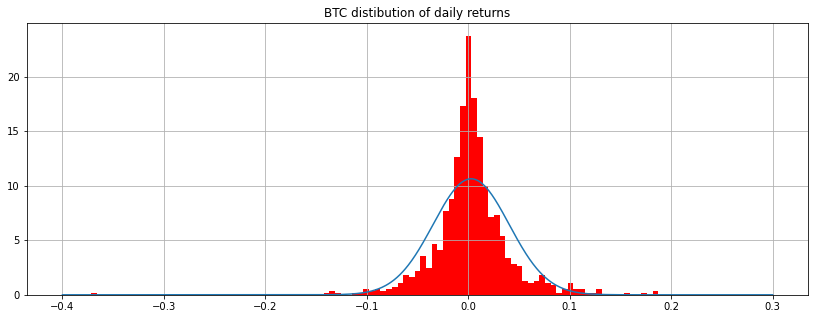

In [76]:
hist=master['BTC']
from scipy import stats  
plt.subplots(figsize=(14,5)) 
hist.hist(bins=100, density=1, color='red')
plt.title('BTC distibution of daily returns')
#most of the daily movements center around 0.0. Data appears relatively symetric.
#additional graphical support for base index.
#code for normal distribution line
xt = plt.xticks()[0] 
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, 1003)
m, s = stats.norm.fit(master['BTC'])  
pdf_g = stats.norm.pdf(lnspc, m, s) 
plt.plot(lnspc, pdf_g, label="Norm") 

Next is a graph of cumulative daily returns for some of the highest market-cap coins. The graph shows that the market experienced high returns between the period 13/10/2020 and 01/05/2021 relative to the rest of the time frame.

From 05/09/2018 through to 01/05/2021, XRP experienced a 200% gain, ETH and BTC approximately 600% and ADA (Cardano) over 800%.

<AxesSubplot:xlabel='Date', ylabel='Cumulative Returns (%)'>

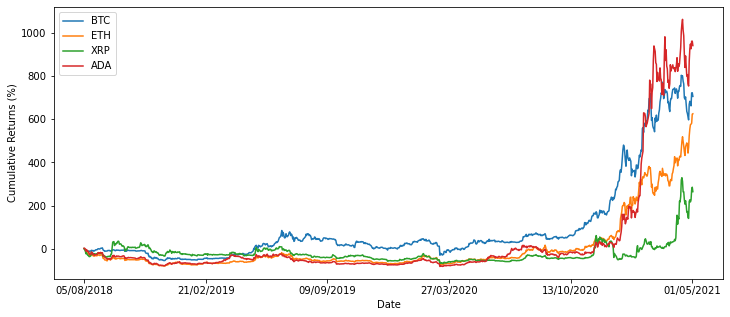

In [18]:
master=master.set_index('Date')
CumulativeReturns=(((1+master).cumprod()-1)*100) #multiplied by 100 for percentages
CumulativeReturns[["BTC", "ETH", "XRP", "ADA"]].plot(figsize=(12,5), ylabel="Cumulative Returns (%)")

Based on the previous graph, it appears that the crypto-market moved a lot between 13/10/2020 to 01/05/2021 (very bullish). For this reason and for further analysis, the cumulative returns for these assets are observed from 13/10/2020 up until the end of the time window.

<AxesSubplot:xlabel='Date', ylabel='Cumulative Returns (%)'>

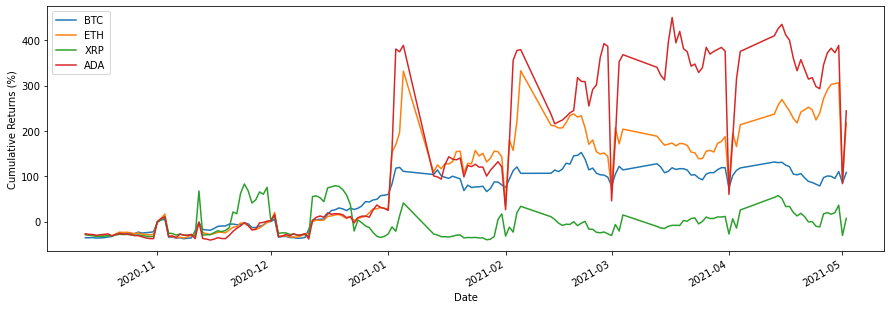

In [19]:
lower_b='2020-10-13'
upper_b='2021-05-02'
master_short=pd.read_csv('/Users/Matt/Desktop/Thesis/master_daily.csv')
master_short['Date'] = pd.to_datetime(master_short['Date'])
limited_period = (master_short['Date'] >= lower_b) & (master_short['Date'] <= upper_b)
updated=master_short[limited_period]
updated.set_index('Date', inplace=True)
CumulativeReturns2=(((1+updated).cumprod()-1)*100) #multiplied by 100 for percentages
CumulativeReturns2[["BTC", "ETH", "XRP", "ADA"]].plot(figsize=(15,5), ylabel="Cumulative Returns (%)")

The graph above shows the high price volatility during a bull-market spread. This maps the risk when investing in crypto-assets.

Here is a correlation matrix for all 25 crypto-assets observed in the dataset.

<AxesSubplot:title={'center':'Correlation matrix for all 25-cryptos'}>

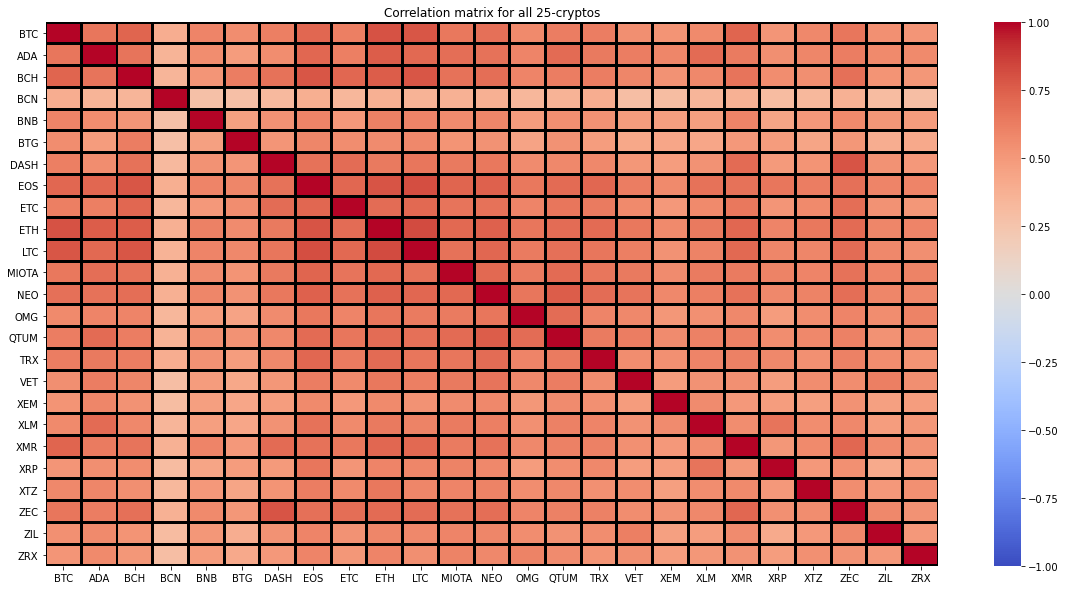

In [20]:
correlation_matirx=master.corr()
correlation_matirx.to_csv(f'/Users/Matt/Desktop/Thesis/corr.csv')
fig, ax = plt.subplots(figsize=(20,10))  
plt.title("Correlation matrix for all 25-cryptos")
sns.heatmap(master.corr(), vmin=-1, vmax=1, center=0, linewidths=2, linecolor="black", ax=ax, cmap="coolwarm")

Next is a smaller corrleation matrix for the highest 8 coins by market-cap on 05 August 2018. 

ADA (Cardano) is often described as the "Etherum Killer" which is interesting given its 0.77 correlation, the highest value relative to other coins.

The matrix also suggests that the price of BTC and ETH tend to move together. This is corroborated with the cumulative return graphical analysis above.

<AxesSubplot:>

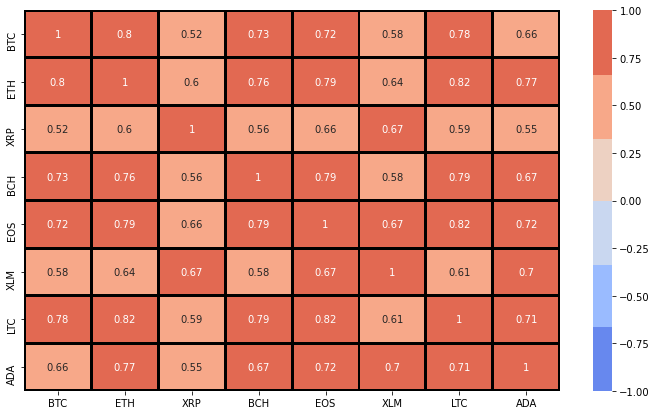

In [21]:
fig, ax = plt.subplots(figsize=(12,7))  
colormap = sns.color_palette("coolwarm", 6)
sns.heatmap(master[['BTC', 'ETH', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA']].corr(), vmin=-1, vmax=1, center=0, linewidths=2, annot=True, ax=ax, cmap=colormap, linecolor="black")

In [116]:
#portfolios based on descending market-cap
basic_statistics3={}
all_mixes={'portfolio1':["BTC"], 'portfolio2':["BTC", "ETH"], 'portfolio3':["BTC", "ETH", "XRP"], 'portfolio4':["BTC", "ETH", "XRP", "BCH"],
           'portfolio5':["BTC", "ETH", "XRP", "BCH", "EOS"], 'portfolio6':["BTC", "ETH", "XRP", "BCH", "EOS", "XLM"],
           'portfolio7':["BTC", "ETH", "XRP", "BCH", "EOS", "XLM", "LTC"],
            'portfolio8':["BTC", "ETH", "XRP", "BCH", "EOS", "XLM", "LTC", "ADA"],
           'portfolio9':["BTC", "ETH", "XRP", "BCH", "EOS", "XLM", "LTC", "ADA", "MIOTA"],
           'portfolio10':["BTC", "ETH", "XRP", "BCH", "EOS", "XLM", "LTC", "ADA", "MIOTA", "TRX"]}
def portfolio_expected_returns3(portfolio):
    mix_returns=[]     #initialization of empty list
    port_sd=[]
    cryptos=len(portfolio)
    p_weights=np.repeat(1/cryptos, cryptos) #allocates equal weighting based on the number of cryptos in the portfolio
    temp=master.iloc[:][portfolio].mul(p_weights, axis=1).sum(axis=1) #dataframe of average expected returns based on the assets in each portfolio
    mix_returns.append(temp.mean()) #appends the mean of each n-portfolio in the crypto-mix to a list
    covariance=master[portfolio].cov()
    annualized_covariance=covariance*ann
    port_sd.append(np.sqrt(np.dot(p_weights.T, np.dot(annualized_covariance, p_weights)))) ##portfolio s_d
    return (((((sum(mix_returns))+1))**ann)-1)*100, (sum(port_sd))*100
for x in range(1, 11):
    basic_statistics3["mix{0}".format(x)] = portfolio_expected_returns3(all_mixes["portfolio{0}".format(x)])
print(basic_statistics3)

{'mix1': (177.89525904261941, 71.68417807191973), 'mix2': (199.21164442779892, 78.4237480929053), 'mix3': (204.06263208236246, 82.23554160833568), 'mix4': (181.6492803133035, 86.36258134747158), 'mix5': (154.82040457944416, 87.82108396102477), 'mix6': (153.61730524983847, 87.99328982929676), 'mix7': (154.2547984269681, 87.59510695997032), 'mix8': (171.1492363013045, 87.91074691614877), 'mix9': (169.2194690266664, 88.21306638096821), 'mix10': (172.7693223446317, 87.92671615530769)}


In [127]:
x7 = PrettyTable()
x7.field_names = ["n", "E[rp]", "std[p]", "Sharpe Ratio"] #n-portfolio from n=2
counter=min_size-2
for i, j in basic_statistics3.values():
    counter+=1 #for creating the n-portfolio column in the table
    x7.add_row([counter, "{:.2f}".format(i)+"%", "{:.2f}".format(j)+"%", "{:.2f}".format((i-rf)/j)])
print(x7)

+----+---------+--------+--------------+
| n  |  E[rp]  | std[p] | Sharpe Ratio |
+----+---------+--------+--------------+
| 1  | 177.90% | 71.68% |     2.46     |
| 2  | 199.21% | 78.42% |     2.52     |
| 3  | 204.06% | 82.24% |     2.46     |
| 4  | 181.65% | 86.36% |     2.08     |
| 5  | 154.82% | 87.82% |     1.74     |
| 6  | 153.62% | 87.99% |     1.72     |
| 7  | 154.25% | 87.60% |     1.74     |
| 8  | 171.15% | 87.91% |     1.93     |
| 9  | 169.22% | 88.21% |     1.90     |
| 10 | 172.77% | 87.93% |     1.94     |
+----+---------+--------+--------------+
